In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import warnings
from scipy.stats import skew
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Depression.csv')
df

,Sadness,Discouragement,Low self-esteem,Inferiority,Guilt,Indecisiveness,Irriability and frustration,Loss of interest in life,Loss of motivation,Poor self-image,...,Psychomotor retardation,Confusion,Scatterbrained,Congitive impairment,Loss of warm feeling toward family or friends,Substance abuse,Hypochondriasis,Suicidal impulse,Childhood trauma,May_have_Depression
0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,1.0,2.0,...,2.0,2.0,2.0,1.0,3.0,2.0,3.0,1.0,1.0,No
1,1.0,3.0,1.0,2.0,2.0,2.0,2.0,3.0,1.0,3.0,...,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,Yes
2,3.0,3.0,1.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,...,2.0,1.0,1.0,3.0,1.0,2.0,2.0,2.0,1.0,Yes
3,1.0,1.0,1.0,2.0,1.0,0.0,1.0,3.0,2.0,1.0,...,3.0,3.0,2.0,2.0,1.0,3.0,2.0,3.0,2.0,Yes
4,3.0,1.0,2.0,0.0,2.0,3.0,1.0,1.0,1.0,2.0,...,2.0,1.0,0.0,3.0,1.0,2.0,1.0,3.0,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1.0,3.0,2.0,1.0,2.0,1.0,2.0,1.0,3.0,2.0,...,2.0,3.0,1.0,3.0,2.0,2.0,1.0,3.0,3.0,No
596,2.0,3.0,3.0,2.0,3.0,1.0,1.0,3.0,2.0,3.0,...,2.0,3.0,1.0,2.0,3.0,1.0,1.0,2.0,3.0,Yes
597,1.0,3.0,1.0,1.0,2.0,0.0,1.0,3.0,1.0,3.0,...,3.0,2.0,1.0,1.0,1.0,2.0,1.0,0.0,3.0,No
598,2.0,1.0,1.0,1.0,2.0,1.0,3.0,2.0,2.0,3.0,...,3.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,No


In [3]:
df.head()

,Sadness,Discouragement,Low self-esteem,Inferiority,Guilt,Indecisiveness,Irriability and frustration,Loss of interest in life,Loss of motivation,Poor self-image,...,Psychomotor retardation,Confusion,Scatterbrained,Congitive impairment,Loss of warm feeling toward family or friends,Substance abuse,Hypochondriasis,Suicidal impulse,Childhood trauma,May_have_Depression
0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,1.0,2.0,...,2.0,2.0,2.0,1.0,3.0,2.0,3.0,1.0,1.0,No
1,1.0,3.0,1.0,2.0,2.0,2.0,2.0,3.0,1.0,3.0,...,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,Yes
2,3.0,3.0,1.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,...,2.0,1.0,1.0,3.0,1.0,2.0,2.0,2.0,1.0,Yes
3,1.0,1.0,1.0,2.0,1.0,0.0,1.0,3.0,2.0,1.0,...,3.0,3.0,2.0,2.0,1.0,3.0,2.0,3.0,2.0,Yes
4,3.0,1.0,2.0,0.0,2.0,3.0,1.0,1.0,1.0,2.0,...,2.0,1.0,0.0,3.0,1.0,2.0,1.0,3.0,0.0,No


In [4]:
df.shape

(600, 31)

In [5]:
df.index

RangeIndex(start=0, stop=600, step=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Sadness                                        600 non-null    float64
 1   Discouragement                                 600 non-null    float64
 2   Low self-esteem                                600 non-null    float64
 3   Inferiority                                    600 non-null    float64
 4   Guilt                                          600 non-null    float64
 5   Indecisiveness                                 600 non-null    float64
 6   Irriability and frustration                    600 non-null    float64
 7   Loss of interest in life                       600 non-null    float64
 8   Loss of motivation                             600 non-null    float64
 9   Poor self-image                                600 non

In [7]:
df.isnull().sum()

Sadness                                          0
Discouragement                                   0
Low self-esteem                                  0
Inferiority                                      0
Guilt                                            0
Indecisiveness                                   0
Irriability and frustration                      0
Loss of interest in life                         0
Loss of motivation                               0
Poor self-image                                  0
Poor memory                                      0
Lose libido                                      0
Sluggish                                         0
Crying spells                                    0
Lack of emotional responsiveness                 0
Helpessness                                      0
Pressimism                                       0
Agitation                                        0
Past failure                                     0
Reduced pain tolerance         

In [8]:
df.dtypes

Sadness                                          float64
Discouragement                                   float64
Low self-esteem                                  float64
Inferiority                                      float64
Guilt                                            float64
Indecisiveness                                   float64
Irriability and frustration                      float64
Loss of interest in life                         float64
Loss of motivation                               float64
Poor self-image                                  float64
Poor memory                                      float64
Lose libido                                      float64
Sluggish                                         float64
Crying spells                                    float64
Lack of emotional responsiveness                 float64
Helpessness                                      float64
Pressimism                                       float64
Agitation                      

In [9]:
df.columns

Index(['Sadness', 'Discouragement', 'Low self-esteem', 'Inferiority', 'Guilt',
       'Indecisiveness', 'Irriability and frustration',
       'Loss of interest in life', 'Loss of motivation', 'Poor self-image',
       'Poor memory', 'Lose libido', 'Sluggish', 'Crying spells',
       'Lack of emotional responsiveness', 'Helpessness', 'Pressimism',
       'Agitation', 'Past failure', 'Reduced pain tolerance',
       'Desire for social support', 'Psychomotor retardation', 'Confusion',
       'Scatterbrained', 'Congitive impairment',
       'Loss of warm feeling toward family or friends', 'Substance abuse',
       'Hypochondriasis', 'Suicidal impulse', 'Childhood trauma',
       'May_have_Depression'],
      dtype='object')

In [10]:
df.nunique()

Sadness                                          4
Discouragement                                   4
Low self-esteem                                  4
Inferiority                                      4
Guilt                                            4
Indecisiveness                                   4
Irriability and frustration                      4
Loss of interest in life                         4
Loss of motivation                               4
Poor self-image                                  4
Poor memory                                      4
Lose libido                                      4
Sluggish                                         4
Crying spells                                    4
Lack of emotional responsiveness                 4
Helpessness                                      4
Pressimism                                       4
Agitation                                        4
Past failure                                     4
Reduced pain tolerance         

In [11]:
print('before drop duplicates: ',df.shape)
df=df.drop_duplicates()
print('after drop duplicates: ',df.shape)

before drop duplicates:  (600, 31)
after drop duplicates:  (600, 31)


In [12]:
print('This dataset has {} observations with {} features.'.format(df.shape[0], df.shape[1]))

This dataset has 600 observations with 31 features.


array([[<AxesSubplot:title={'center':'Sadness'}>,
        <AxesSubplot:title={'center':'Discouragement'}>,
        <AxesSubplot:title={'center':'Low self-esteem'}>,
        <AxesSubplot:title={'center':'Inferiority'}>,
        <AxesSubplot:title={'center':'Guilt'}>,
        <AxesSubplot:title={'center':'Indecisiveness'}>],
       [<AxesSubplot:title={'center':'Irriability and frustration'}>,
        <AxesSubplot:title={'center':'Loss of interest in life'}>,
        <AxesSubplot:title={'center':'Loss of motivation'}>,
        <AxesSubplot:title={'center':'Poor self-image'}>,
        <AxesSubplot:title={'center':'Poor memory'}>,
        <AxesSubplot:title={'center':'Lose libido'}>],
       [<AxesSubplot:title={'center':'Sluggish'}>,
        <AxesSubplot:title={'center':'Crying spells'}>,
        <AxesSubplot:title={'center':'Lack of emotional responsiveness'}>,
        <AxesSubplot:title={'center':'Helpessness'}>,
        <AxesSubplot:title={'center':'Pressimism'}>,
        <AxesSubplot:

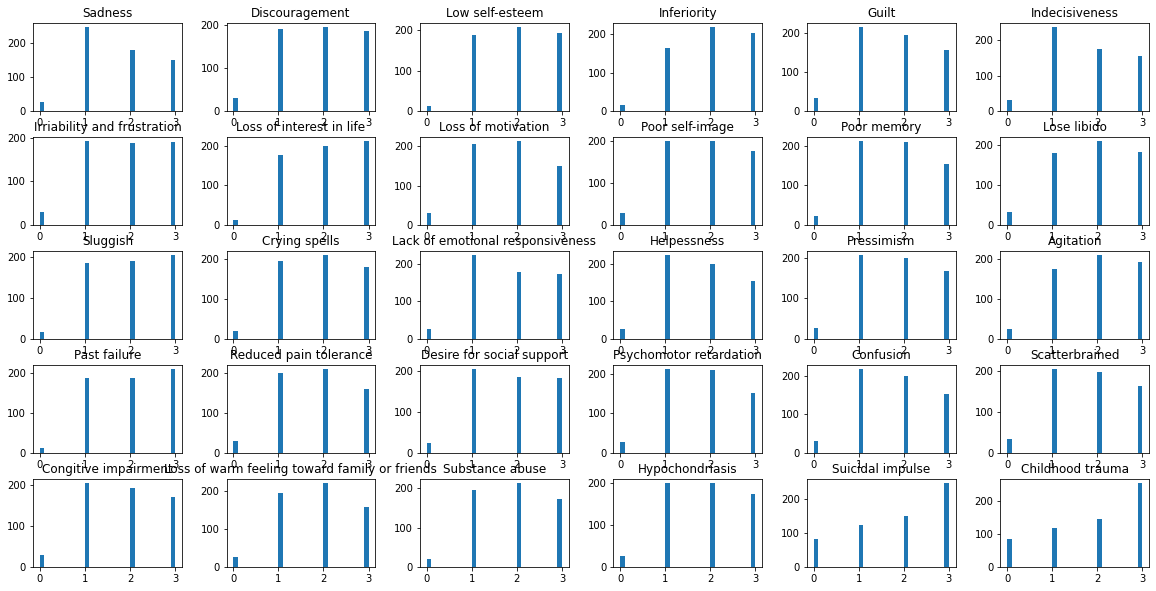

In [13]:
df.hist(figsize=(20,10), grid=False, layout=(5, 6), bins = 30)

In [14]:
numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=[np.object]).columns

In [15]:
numerical_features

Index(['Sadness', 'Discouragement', 'Low self-esteem', 'Inferiority', 'Guilt',
       'Indecisiveness', 'Irriability and frustration',
       'Loss of interest in life', 'Loss of motivation', 'Poor self-image',
       'Poor memory', 'Lose libido', 'Sluggish', 'Crying spells',
       'Lack of emotional responsiveness', 'Helpessness', 'Pressimism',
       'Agitation', 'Past failure', 'Reduced pain tolerance',
       'Desire for social support', 'Psychomotor retardation', 'Confusion',
       'Scatterbrained', 'Congitive impairment',
       'Loss of warm feeling toward family or friends', 'Substance abuse',
       'Hypochondriasis', 'Suicidal impulse', 'Childhood trauma'],
      dtype='object')

In [16]:
categorical_features

Index(['May_have_Depression'], dtype='object')

In [17]:
skew_values = skew(df[numerical_features], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
0,Sadness,0.122503
5,Indecisiveness,0.058469
15,Helpessness,0.007964
14,Lack of emotional responsiveness,-0.020549
10,Poor memory,-0.023913
22,Confusion,-0.027713
21,Psychomotor retardation,-0.043409
4,Guilt,-0.046465
8,Loss of motivation,-0.073641
16,Pressimism,-0.088595


In [18]:
df['May_have_Depression'].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
label_encoder= LabelEncoder()

In [20]:
df['May_have_Depression'] = label_encoder.fit_transform(df['May_have_Depression'])
df['May_have_Depression'].unique()

array([0, 1])

<AxesSubplot:xlabel='May_have_Depression', ylabel='count'>

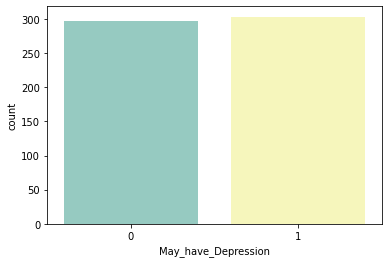

In [21]:
sns.countplot(x = 'May_have_Depression', data = df, palette="Set3")

In [22]:
#df.sort_index(axis=1, ascending=False, inplace=True)
#df.head(10)

In [23]:
#sns.pairplot(df, diag_kind='kde')
#plt.show()

In [24]:
corr=df.corr()

<AxesSubplot:>

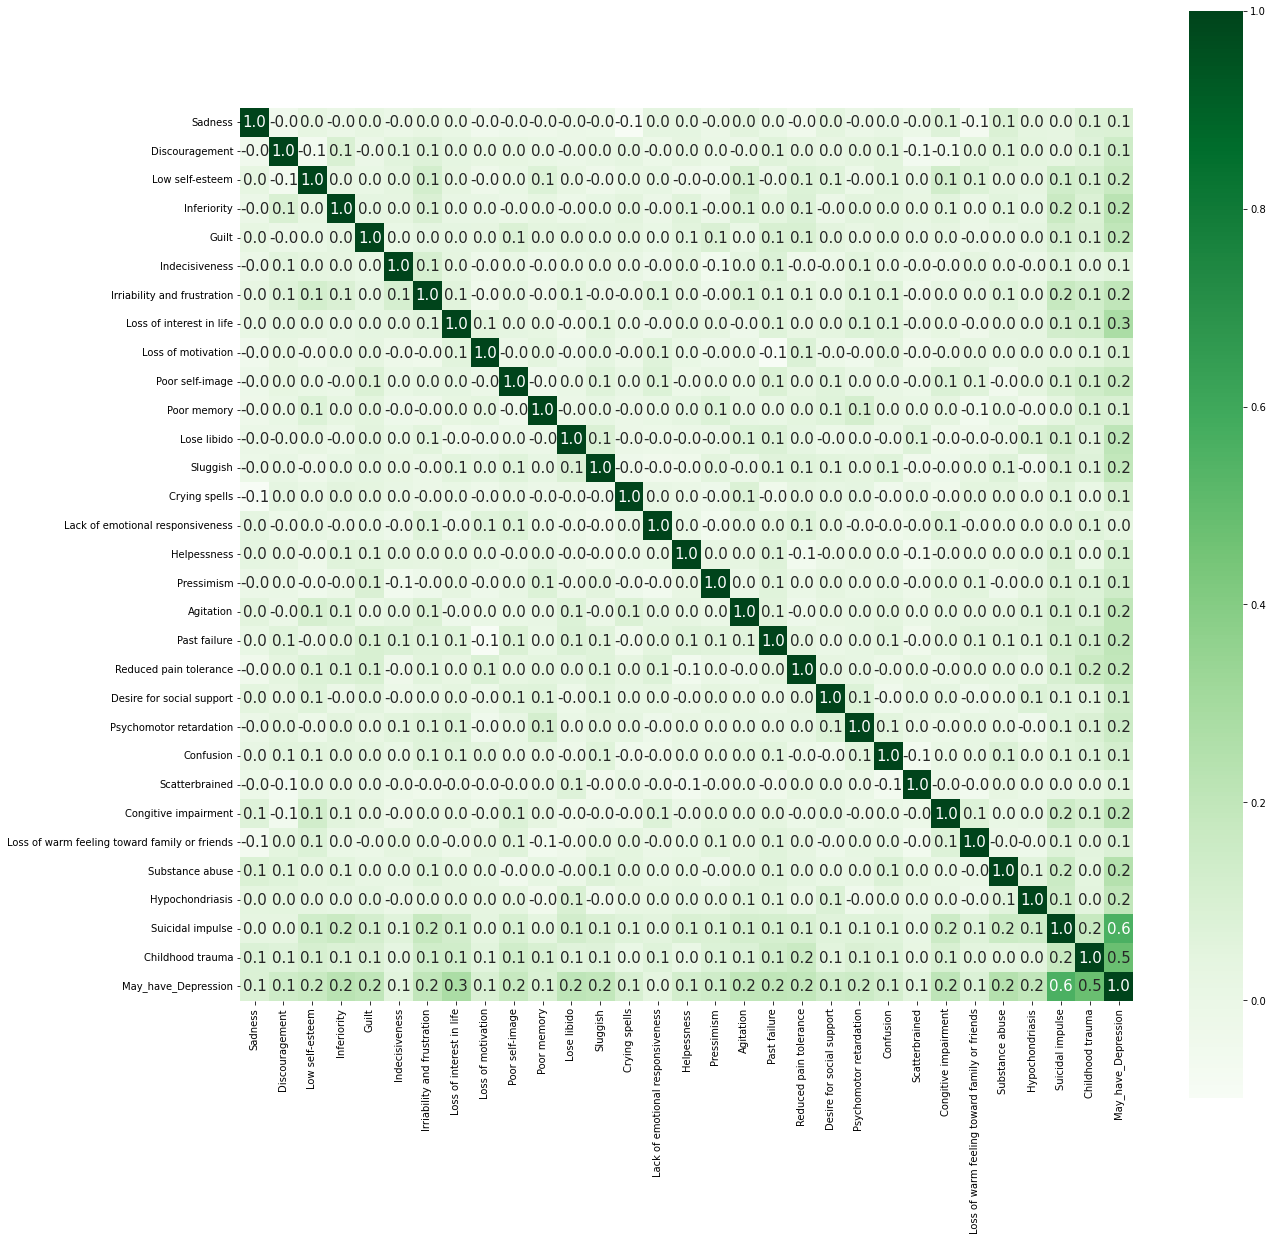

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

<AxesSubplot:>

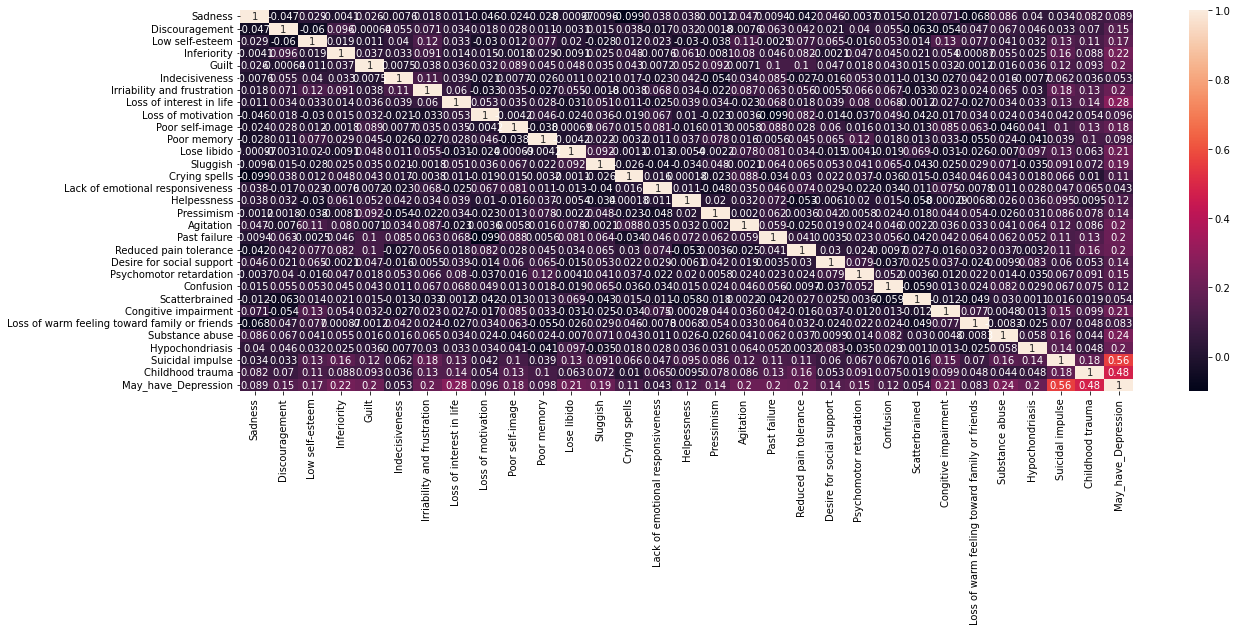

In [26]:
import seaborn as sb

plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True)

In [27]:
df.corr()

,Sadness,Discouragement,Low self-esteem,Inferiority,Guilt,Indecisiveness,Irriability and frustration,Loss of interest in life,Loss of motivation,Poor self-image,...,Psychomotor retardation,Confusion,Scatterbrained,Congitive impairment,Loss of warm feeling toward family or friends,Substance abuse,Hypochondriasis,Suicidal impulse,Childhood trauma,May_have_Depression
Sadness,1.000000,-0.046809,0.028995,-0.004055,0.026416,-0.007554,0.018472,0.011038,-0.046338,-0.023773,...,-0.003709,0.014847,-0.011578,0.070575,-0.067508,0.085778,0.040288,0.033987,0.081865,0.088556
Discouragement,-0.046809,1.000000,-0.059693,0.096310,-0.000642,0.054700,0.071482,0.034248,0.017708,0.027827,...,0.039610,0.055478,-0.063455,-0.054010,0.046870,0.066971,0.045593,0.032833,0.070138,0.145265
Low self-esteem,0.028995,-0.059693,1.000000,0.019447,0.010547,0.039849,0.121185,0.032900,-0.029508,0.011674,...,-0.015848,0.053053,0.013654,0.131419,0.077301,0.040976,0.032191,0.134477,0.110428,0.168105
Inferiority,-0.004055,0.096310,0.019447,1.000000,0.037280,0.033397,0.091163,0.013569,0.015260,-0.001842,...,0.047233,0.044505,0.021152,0.053749,0.000871,0.055227,0.024954,0.164402,0.088236,0.223117
Guilt,0.026416,-0.000642,0.010547,0.037280,1.000000,0.007455,0.038059,0.036283,0.031801,0.088760,...,0.017737,0.042862,0.015024,0.031788,-0.001200,0.015923,0.035822,0.119956,0.093203,0.202366
Indecisiveness,-0.007554,0.054700,0.039849,0.033397,0.007455,1.000000,0.109563,0.038917,-0.021456,0.007680,...,0.052621,0.010777,-0.013231,-0.026713,0.041897,0.015651,-0.007669,0.061670,0.036044,0.052949
Irriability and frustration,0.018472,0.071482,0.121185,0.091163,0.038059,0.109563,1.000000,0.059597,-0.033450,0.034883,...,0.066349,0.067207,-0.032977,0.023290,0.024449,0.065265,0.029664,0.179453,0.134181,0.199202
Loss of interest in life,0.011038,0.034248,0.032900,0.013569,0.036283,0.038917,0.059597,1.000000,0.052605,0.035058,...,0.079830,0.067690,-0.001213,0.026566,-0.026583,0.033717,0.033144,0.127498,0.135197,0.276259
Loss of motivation,-0.046338,0.017708,-0.029508,0.015260,0.031801,-0.021456,-0.033450,0.052605,1.000000,-0.004191,...,-0.036828,0.048714,-0.041957,-0.016700,0.034118,0.024407,0.033948,0.041857,0.053708,0.095991
Poor self-image,-0.023773,0.027827,0.011674,-0.001842,0.088760,0.007680,0.034883,0.035058,-0.004191,1.000000,...,0.015802,0.012766,-0.012578,0.085370,0.063044,-0.046289,0.040895,0.101213,0.133651,0.177388


In [28]:
from scipy.stats import pearsonr,spearmanr
L=[]
for i in df.columns:
    pearsonCor,_=pearsonr(df[i],df['May_have_Depression'])
    L.append(pearsonCor)
    print(i,' - pearsonCor={}'.format(pearsonCor))

Sadness  - pearsonCor=0.08855631099284801
Discouragement  - pearsonCor=0.1452650341210125
Low self-esteem  - pearsonCor=0.16810489680234442
Inferiority  - pearsonCor=0.22311728905332415
Guilt  - pearsonCor=0.20236585116232136
Indecisiveness  - pearsonCor=0.05294900298847594
Irriability and frustration  - pearsonCor=0.19920175542832483
Loss of interest in life  - pearsonCor=0.27625872493140424
Loss of motivation  - pearsonCor=0.09599115467772643
Poor self-image  - pearsonCor=0.1773875742528931
Poor memory  - pearsonCor=0.09755885985808724
Lose libido  - pearsonCor=0.20811995281121012
Sluggish  - pearsonCor=0.19377862070312185
Crying spells  - pearsonCor=0.10538452213825278
Lack of emotional responsiveness  - pearsonCor=0.042779012542045525
Helpessness  - pearsonCor=0.12293109112462403
Pressimism  - pearsonCor=0.1376319686512031
Agitation  - pearsonCor=0.2031675618514765
Past failure  - pearsonCor=0.20282102887263054
Reduced pain tolerance  - pearsonCor=0.19536040303066654
Desire for soc

In [29]:
L.sort(reverse=True)
L

[1.0,
 0.5605785188856619,
 0.47921960537899116,
 0.27625872493140424,
 0.24441237512398617,
 0.22311728905332415,
 0.20811995281121012,
 0.208020284013443,
 0.2031675618514765,
 0.20282102887263054,
 0.20236585116232136,
 0.2000821389995554,
 0.19920175542832483,
 0.19536040303066654,
 0.19377862070312185,
 0.1773875742528931,
 0.16810489680234442,
 0.15041585569309102,
 0.1452650341210125,
 0.1376319686512031,
 0.13727181363795887,
 0.12293109112462403,
 0.11772078307077855,
 0.10538452213825278,
 0.09755885985808724,
 0.09599115467772643,
 0.08855631099284801,
 0.08298322603375329,
 0.053934506894818574,
 0.05294900298847594,
 0.042779012542045525]

<AxesSubplot:>

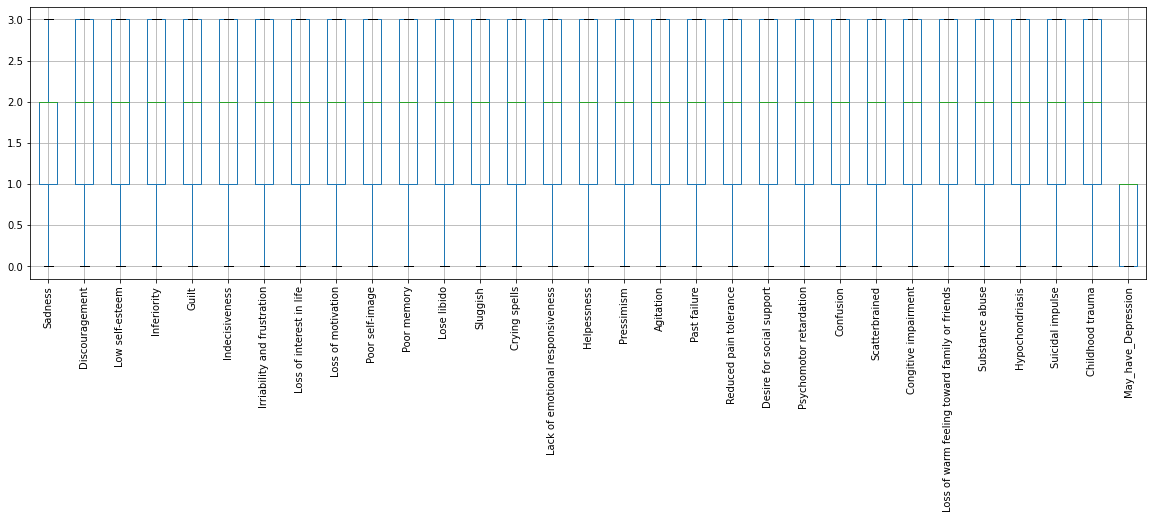

In [30]:
df.boxplot( rot = 90, figsize=(20,5))

In [31]:
Q1 = df.quantile(0.25)
Q2 = df.quantile(0.5)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

Sadness                                          1.0
Discouragement                                   2.0
Low self-esteem                                  2.0
Inferiority                                      2.0
Guilt                                            2.0
Indecisiveness                                   2.0
Irriability and frustration                      2.0
Loss of interest in life                         2.0
Loss of motivation                               2.0
Poor self-image                                  2.0
Poor memory                                      2.0
Lose libido                                      2.0
Sluggish                                         2.0
Crying spells                                    2.0
Lack of emotional responsiveness                 2.0
Helpessness                                      2.0
Pressimism                                       2.0
Agitation                                        2.0
Past failure                                  

In [32]:
#show outlier data
Upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)
print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))

     Sadness  Discouragement  Low self-esteem  Inferiority  Guilt  \
0      False           False            False        False  False   
1      False           False            False        False  False   
2      False           False            False        False  False   
3      False           False            False        False  False   
4      False           False            False        False  False   
..       ...             ...              ...          ...    ...   
595    False           False            False        False  False   
596    False           False            False        False  False   
597    False           False            False        False  False   
598    False           False            False        False  False   
599    False           False            False        False  False   

     Indecisiveness  Irriability and frustration  Loss of interest in life  \
0             False                        False                     False   
1             F

In [33]:
from sklearn.preprocessing import scale,StandardScaler,normalize,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()

ardata=normalize(df,norm='l2',axis=0)
ardata = StandardScaler().fit(ardata).transform(ardata)
#ardata=MinMaxScaler(feature_range=(0,1)).fit_transform(ardata)
DFdata=pd.DataFrame(ardata,columns=df.columns)
labels = DFdata['May_have_Depression']
data=DFdata.drop('May_have_Depression',axis=1)
labels = label_encoder.fit_transform(labels)

In [34]:
from sklearn.linear_model import Lasso

ls=Lasso(alpha=0.1,normalize=True)
ls.fit(data,labels)

z=ls.coef_
z

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

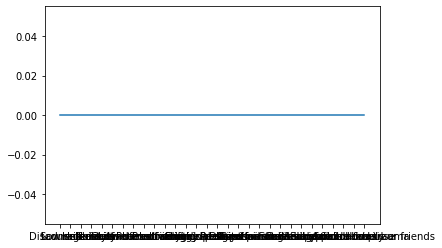

In [35]:
plt.plot(data.columns,z)
plt.show()

In [36]:
X = data  
y = labels

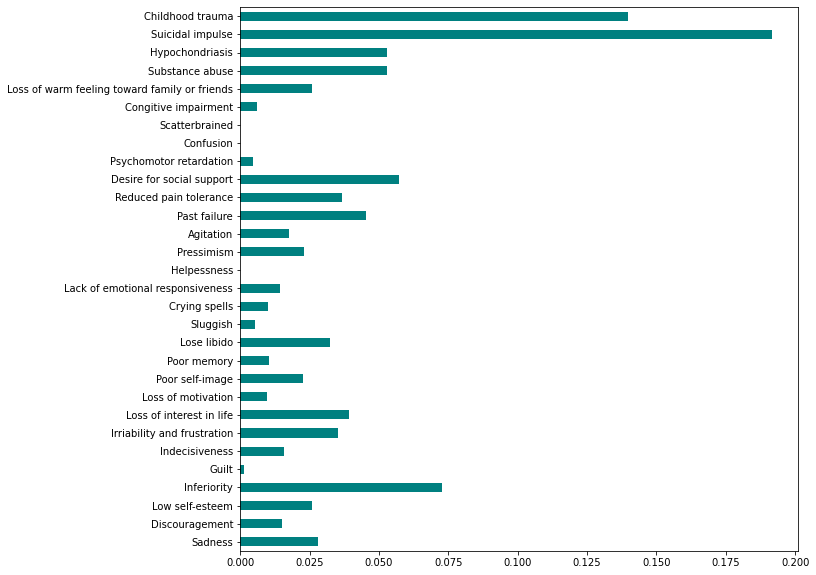

In [37]:
from sklearn.feature_selection import mutual_info_classif

importance = mutual_info_classif(X,y)
feat_importances=pd.Series(importance,df.columns[0:len(df.columns)-1])
plt.figure(figsize=(10,10))
feat_importances.plot(kind='barh',color='teal')
plt.show()

In [38]:
feat_importances

Sadness                                          0.028188
Discouragement                                   0.015110
Low self-esteem                                  0.025723
Inferiority                                      0.072622
Guilt                                            0.001330
Indecisiveness                                   0.015770
Irriability and frustration                      0.035161
Loss of interest in life                         0.039278
Loss of motivation                               0.009577
Poor self-image                                  0.022496
Poor memory                                      0.010485
Lose libido                                      0.032244
Sluggish                                         0.005446
Crying spells                                    0.010026
Lack of emotional responsiveness                 0.014248
Helpessness                                      0.000000
Pressimism                                       0.022825
Agitation     

In [135]:
# Suicidal impulse,Childhood trauma,Inferiority,Desire for social support,Hypochondriasis,Substance abuse,Past failure,Loss of interest in life,Reduced pain tolerance,Irriability and frustration,Lose libido 

In [39]:
L=list(feat_importances)
L.sort(reverse=True)
L

[0.191531897734331,
 0.1397823329824095,
 0.07262176500326878,
 0.05716794505873679,
 0.053079138132662074,
 0.05276052803305453,
 0.04531105460084017,
 0.03927774929351591,
 0.036719651165127765,
 0.035161239138524536,
 0.03224353511052658,
 0.028187548477333957,
 0.025723248888034567,
 0.02571326136237362,
 0.022824693059331436,
 0.022496453223545432,
 0.01751295850475665,
 0.015769697129335514,
 0.015110262953260678,
 0.01424751628730192,
 0.010484656324791786,
 0.010025643252928873,
 0.009576689772628377,
 0.0058781638618348175,
 0.0054458820555203236,
 0.004484327578292646,
 0.001330000058460179,
 0.0,
 0.0,
 0.0]

In [95]:
data=df[['Suicidal impulse','Childhood trauma','Inferiority','Desire for social support','Hypochondriasis','Substance abuse','Past failure','Loss of interest in life','Reduced pain tolerance','Irriability and frustration','Lose libido','Sadness','Low self-esteem','Loss of warm feeling toward family or friends','Poor self-image','Pressimism']]
X=data

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(480, 16)
(120, 16)
(480,)
(120,)


In [97]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [98]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import RFE

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

#from sklearn.linear_model import LogisticRegression
tree=DecisionTreeClassifier()
rfe = RFE(tree,n_features_to_select=7, step=1) # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
tree.fit(X_train_rfe,y_train)
y_predict=tree.predict(X_train_rfe)

from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

ACC=accuracy_score(y_train,y_predict)
MAE=mean_squared_error(y_train,y_predict)
CM=confusion_matrix(y_train,y_predict)
CR=classification_report(y_train,y_predict)
print('ACC={} \n MAE  ={} \n confusion_matrix=\n{} \n classification_report=\n{}'.format(ACC,MAE,CM,CR))

ACC=0.99375 
 MAE  =0.00625 
 confusion_matrix=
[[234   1]
 [  2 243]] 
 classification_report=
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       235
           1       1.00      0.99      0.99       245

    accuracy                           0.99       480
   macro avg       0.99      0.99      0.99       480
weighted avg       0.99      0.99      0.99       480



In [99]:
col

Int64Index([0, 1, 3, 4, 5, 7, 10], dtype='int64')

In [100]:
from sklearn.linear_model import LogisticRegression

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
lr=LogisticRegression(C=0.9, solver='liblinear')
rfe = RFE(lr,n_features_to_select=14, step=1) # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
lr.fit(X_train_rfe,y_train)
y_predict=lr.predict(X_train_rfe)

from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

ACC=accuracy_score(y_train,y_predict)
MAE=mean_squared_error(y_train,y_predict)
CM=confusion_matrix(y_train,y_predict)
CR=classification_report(y_train,y_predict)
print('ACC={} \n MAE  ={} \n confusion_matrix=\n{} \n classification_report=\n{}'.format(ACC,MAE,CM,CR))

ACC=0.9020833333333333 
 MAE  =0.09791666666666667 
 confusion_matrix=
[[207  28]
 [ 19 226]] 
 classification_report=
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       235
           1       0.89      0.92      0.91       245

    accuracy                           0.90       480
   macro avg       0.90      0.90      0.90       480
weighted avg       0.90      0.90      0.90       480



In [102]:
from sklearn.feature_selection import RFE
from sklearn import svm

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

nb = svm.SVC(kernel='rbf')
nb.fit(X_train, y_train) 

rfe = RFE(nb,n_features_to_select=16, step=1) # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
nb.fit(X_train_rfe,y_train)
y_predict=nb.predict(X_train_rfe)

from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

ACC=accuracy_score(y_train,y_predict)
MAE=mean_squared_error(y_train,y_predict)
CM=confusion_matrix(y_train,y_predict)
CR=classification_report(y_train,y_predict)
print('ACC={} \n MAE  ={} \n confusion_matrix=\n{} \n classification_report=\n{}'.format(ACC,MAE,CM,CR))

ACC=0.96875 
 MAE  =0.03125 
 confusion_matrix=
[[222  13]
 [  2 243]] 
 classification_report=
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       235
           1       0.95      0.99      0.97       245

    accuracy                           0.97       480
   macro avg       0.97      0.97      0.97       480
weighted avg       0.97      0.97      0.97       480



In [104]:
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

classifier = GaussianNB() 

rfe = RFE(classifier,n_features_to_select=16, step=1) # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
classifier.fit(X_train_rfe,y_train)
y_predict=classifier.predict(X_train_rfe)

from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

ACC=accuracy_score(y_train,y_predict)
MAE=mean_squared_error(y_train,y_predict)
CM=confusion_matrix(y_train,y_predict)
CR=classification_report(y_train,y_predict)
print('ACC={} \n MAE  ={} \n confusion_matrix=\n{} \n classification_report=\n{}'.format(ACC,MAE,CM,CR))

ACC=0.8833333333333333 
 MAE  =0.11666666666666667 
 confusion_matrix=
[[195  40]
 [ 16 229]] 
 classification_report=
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       235
           1       0.85      0.93      0.89       245

    accuracy                           0.88       480
   macro avg       0.89      0.88      0.88       480
weighted avg       0.89      0.88      0.88       480



In [105]:
from sklearn.feature_selection import RFE
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

nb = svm.SVC(kernel='rbf')
nb.fit(X_train, y_train) 

rfe = RFE(nb,n_features_to_select=16, step=1) # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
nb.fit(X_train_rfe,y_train)
y_predict=nb.predict(X_train_rfe)

from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

ACC=accuracy_score(y_train,y_predict)
MAE=mean_squared_error(y_train,y_predict)
CM=confusion_matrix(y_train,y_predict)
CR=classification_report(y_train,y_predict)
print('ACC={} \n MAE  ={} \n confusion_matrix=\n{} \n classification_report=\n{}'.format(ACC,MAE,CM,CR))

ACC=0.96875 
 MAE  =0.03125 
 confusion_matrix=
[[222  13]
 [  2 243]] 
 classification_report=
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       235
           1       0.95      0.99      0.97       245

    accuracy                           0.97       480
   macro avg       0.97      0.97      0.97       480
weighted avg       0.97      0.97      0.97       480



In [106]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,100):
    model= KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    Result=model.score(X_test,y_test)
    print(f"neighbors : {i} , score : {Result}")

neighbors : 1 , score : 0.7583333333333333
neighbors : 2 , score : 0.7666666666666667
neighbors : 3 , score : 0.85
neighbors : 4 , score : 0.825
neighbors : 5 , score : 0.7916666666666666
neighbors : 6 , score : 0.8166666666666667
neighbors : 7 , score : 0.8083333333333333
neighbors : 8 , score : 0.8083333333333333
neighbors : 9 , score : 0.8083333333333333
neighbors : 10 , score : 0.8416666666666667
neighbors : 11 , score : 0.8166666666666667
neighbors : 12 , score : 0.8333333333333334
neighbors : 13 , score : 0.8083333333333333
neighbors : 14 , score : 0.825
neighbors : 15 , score : 0.8083333333333333
neighbors : 16 , score : 0.8166666666666667
neighbors : 17 , score : 0.8
neighbors : 18 , score : 0.825
neighbors : 19 , score : 0.8
neighbors : 20 , score : 0.825
neighbors : 21 , score : 0.8083333333333333
neighbors : 22 , score : 0.8416666666666667
neighbors : 23 , score : 0.8083333333333333
neighbors : 24 , score : 0.8333333333333334
neighbors : 25 , score : 0.8083333333333333
neigh

The accuracy of KNN is:  0.85
[[47 15]
 [ 3 55]]
              precision    recall  f1-score   support

           0       0.94      0.76      0.84        62
           1       0.79      0.95      0.86        58

    accuracy                           0.85       120
   macro avg       0.86      0.85      0.85       120
weighted avg       0.87      0.85      0.85       120



<AxesSubplot:>

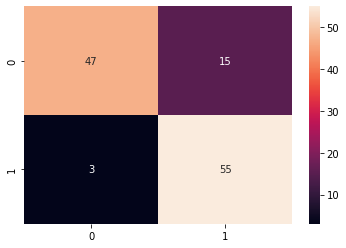

In [107]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
#print('y_predict={} \n y_test  ={}'.format(y_pred,y_test))
ac = accuracy_score(y_test,y_pred)
print('The accuracy of KNN is: ', round(ac,2))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))
sns.heatmap(cm,annot=True)

In [108]:
from sklearn.tree import DecisionTreeClassifier

for i in range(1,20):
    classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = i, random_state=4)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    ac=metrics.accuracy_score(y_test, y_pred)
    print('The accuracy of Decision Tree Classification is: ', round(ac,2),'i=',i)

The accuracy of Decision Tree Classification is:  0.72 i= 1
The accuracy of Decision Tree Classification is:  0.76 i= 2
The accuracy of Decision Tree Classification is:  0.76 i= 3
The accuracy of Decision Tree Classification is:  0.81 i= 4
The accuracy of Decision Tree Classification is:  0.78 i= 5
The accuracy of Decision Tree Classification is:  0.8 i= 6
The accuracy of Decision Tree Classification is:  0.82 i= 7
The accuracy of Decision Tree Classification is:  0.82 i= 8
The accuracy of Decision Tree Classification is:  0.82 i= 9
The accuracy of Decision Tree Classification is:  0.82 i= 10
The accuracy of Decision Tree Classification is:  0.81 i= 11
The accuracy of Decision Tree Classification is:  0.82 i= 12
The accuracy of Decision Tree Classification is:  0.82 i= 13
The accuracy of Decision Tree Classification is:  0.82 i= 14
The accuracy of Decision Tree Classification is:  0.82 i= 15
The accuracy of Decision Tree Classification is:  0.82 i= 16
The accuracy of Decision Tree Clas

The accuracy of Decision Tree Classification is:  0.82
[[46 16]
 [ 6 52]]
              precision    recall  f1-score   support

           0       0.88      0.74      0.81        62
           1       0.76      0.90      0.83        58

    accuracy                           0.82       120
   macro avg       0.82      0.82      0.82       120
weighted avg       0.83      0.82      0.82       120



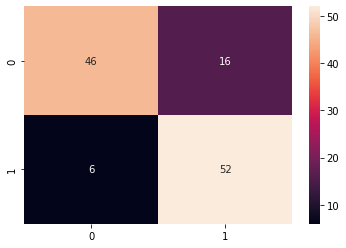

In [109]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
ac=metrics.accuracy_score(y_test, y_pred)
print('The accuracy of Decision Tree Classification is: ', round(ac,2))
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))

The accuracy of Logistic Regression is:  0.91
[[52 10]
 [ 1 57]]
              precision    recall  f1-score   support

           0       0.98      0.84      0.90        62
           1       0.85      0.98      0.91        58

    accuracy                           0.91       120
   macro avg       0.92      0.91      0.91       120
weighted avg       0.92      0.91      0.91       120



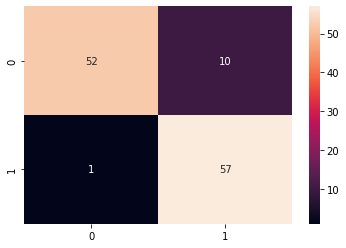

In [110]:
# Classification LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
y_pred = LR.predict(X_test)
ac=metrics.accuracy_score(y_test, y_pred)
print('The accuracy of Logistic Regression is: ', round(ac,2))
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))

Accuracy of the SVM Model:  0.87
[[51 11]
 [ 5 53]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.86        62
           1       0.83      0.91      0.87        58

    accuracy                           0.87       120
   macro avg       0.87      0.87      0.87       120
weighted avg       0.87      0.87      0.87       120



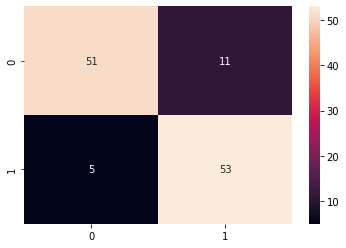

In [111]:
# Classification SVM
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the SVM Model: ",round(accuracy,2))
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))

The accuracy of Naive bayes is:  0.875
[[50 12]
 [ 3 55]]
              precision    recall  f1-score   support

           0       0.94      0.81      0.87        62
           1       0.82      0.95      0.88        58

    accuracy                           0.88       120
   macro avg       0.88      0.88      0.87       120
weighted avg       0.88      0.88      0.87       120



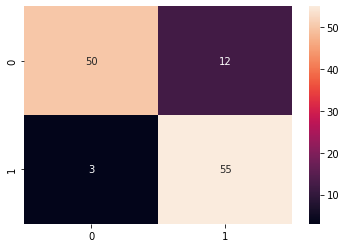

In [112]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
ac = accuracy_score(y_test,y_pred)
print('The accuracy of Naive bayes is: ', ac)
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))